<a href="https://colab.research.google.com/github/Aboelsaood23/Aboelsaood23/blob/main/specilaization_1_Course_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WEEK_1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# kmeans :Starts by guessing the initial centroids, and then
#Refines this guess by :Repeatedly assigning examples to their closest centroids, and then,Recomputing the centroids based on the assignments.
#The k-means algorithm will always converge to some final set of means for the centroids.
#However, that the converged solution may not always be ideal and depends on the initial setting of the centroids.
#One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion)

from google.colab import drive
drive.mount('/content/drive')
data_path ="/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/ex7_X.npy"

def load_data (file_path):
  x =np.load(file_path)
  return x

x =load_data(data_path) #has two features and shape (300,2)

# let's explore our data
print("First rive elements of x are :\n",x[:5])
print("the shape of x is",x.shape)


# function to fined closest_centroids
def find_closest_centroids(x,centroids) :
  #return idx(aray), on shape (m,) it contain sigle value for each example if this value is 2 means example one on cluster number 2
  # if it's 5 means example 2 on cluster 5

  #set number of number of clusters
  k =centroids.shape[0] # intialized centroid cout and values we have to set them first using kMeans_init_centroids function
  #create array to save indexis on it
  idx =np.zeros(x.shape[0],dtype =int)

  for i in range(x.shape[0]):
    distance =[]
    for j in range(centroids.shape[0]):
      normal_ij_L2 =np.linalg.norm(x[i]-centroids[j])
      distance.append(normal_ij_L2)
    idx[i] =np.argmin(distance) # index number on distance list it's same index ordering of centroids

  return idx




#select centroids "we did manulay here and these values are not exist on out origianl dataset x "
# in reality K_manes choose values randomly as initialized centroids from the dataset itself
initial_centroids = np.array([[3,3], [6,2], [8,5]]) #not that we have 3 cluster categories count of clusters starts from 0,1,2
idx = find_closest_centroids(x, initial_centroids)

print("\nFirst three elements in idx are ",idx[:3])

#Compute centroids
def compute_centroids(x,idx,k):
  #x dataset on shape of (m,n)
  #idx array contain index of centroids
  #k is number of examples
  m,n =x.shape
  centroids =np.zeros((k,n)) # centroids is array on shape of number of examples and features
  for k in range(k):
    points =x[idx==k]
    centroids[k] =np.mean(points,axis =0)
  return centroids

# let's check this function
k = 3
centroids = compute_centroids(x,idx,k)
print("The centroids are :", centroids)


Mounted at /content/drive
First rive elements of x are :
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
the shape of x is (300, 2)

First three elements in idx are  [0 2 1]
The centroids are : [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [ ]:

def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)



def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plt.scatter(X[:, 0], X[:, 1], c=idx)     # plots data points in X, coloring them so that those with the same


    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)

    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])

    plt.title("Iteration number %d" %i)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


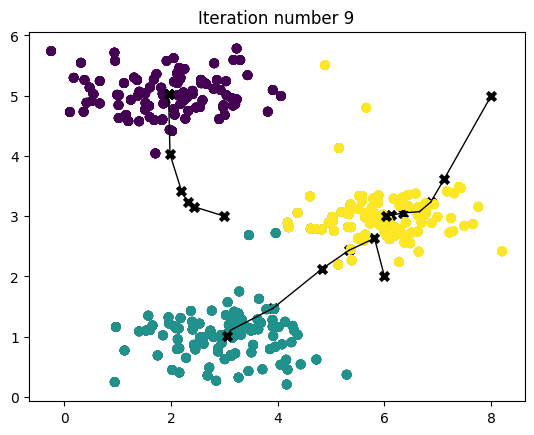

In [ ]:
# we need to do all preveious steps on a loop
def run_kmeans(x,initial_centroids,max_iters =10,plot_progress =False):
  m,n =x.shape
  k =initial_centroids.shape[0] #it looks we will provide this initial_centroids manualy
  centroids =initial_centroids
  previuos_centroids =centroids
  idx =np.zeros(m)
  for i in range(max_iters):
    print("K-Means iteration %d/%d" % (i, max_iters-1)) #output progress
    idx =find_closest_centroids(x,centroids)
    if plot_progress:
      plot_progress_kMeans(x,centroids,previuos_centroids,idx,k,i)
      previuos_centroids =centroids

    centroids =compute_centroids(x,idx,k)
  plt.show()
  return centroids,idx

#let's chcek this code with new centroids
x =load_data(data_path)
intial_centroids =np.array([[3,3],[6,2],[8,5]])
k = 3
max_iters = 10

centroids, idx = run_kmeans(x, initial_centroids, max_iters, plot_progress=True)

In [ ]:
#a good strategy for initializing the centroids is to select random examples from the training set

def kMeans_init_centroids(X, K):
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])  #his function generates a random permutation of integers from 0 to ,It returns a new array containing the shuffled indices, but it doesn't modify the input array itself.

    # Take the first K points as initial centroids, where k is numer of cetroids you want to assign examples to it
    centroids = X[randidx[:K]]

    return centroids


###IMage compression with k_means

Shape of original_img is : (128, 128, 3)


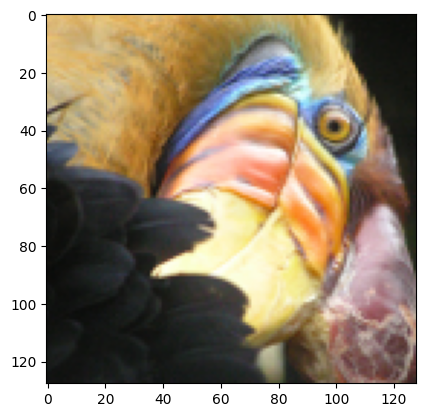

In [ ]:
#on a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
#    Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of colors to 16 colors.
#Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.

#load image
original_image =plt.imread("/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/bird_small.png")
#visualize image
plt.imshow(original_image)
#cehck dimensions of shape
print("Shape of original_img is :",original_image.shape)

#To call the run_kMeans, you need to first transform the matrix original_img into a two-dimensional matrix.
#new shape is m*3 where m is 128*128
original_img =original_image/255
x_img =np.reshape(original_image,(original_img.shape[0]*original_img.shape[1],3))


In [ ]:
#k-means on image pixels
k =16
max_iters =10
initial_centroids =kMeans_init_centroids(x_img,k)# initlaize centroids from pixels of images
centroids,idx =run_kmeans(x_img,initial_centroids ,max_iters)


print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

#After finding the top colors to represent the image, you can now assign each pixel position to its closest centroid using the find_closest_centroids function.
#previus image needs =128*128*24 =393216 bits
#new image needs = 16*24+128*128*4 =6520 bits
print("\nx_img shape",x_img.shape)
print("centroids shape", centroids.shape)
print("idx shape",idx.shape)


# Represent image in terms of indices
x_recovered = centroids[idx, :] # so we go to each on reshaped image and represnet it's value with coressponding centroids,but here we created new image with the centroids

# Reshape recovered image into proper dimensions
x_recovered_ = np.reshape(x_recovered, original_img.shape)



K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Shape of idx: (16384,)
Closest centroid for the first five elements: [11 11 11 11 11]

x_img shape (16384, 3)
centroids shape (16, 3)
idx shape (16384,)


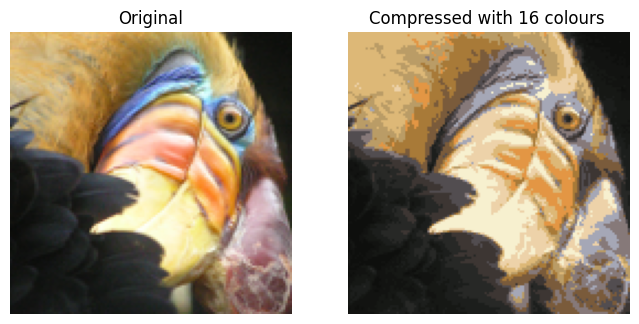

In [ ]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(np.clip(x_recovered_ * 255, 0, 255).astype(np.uint8))
ax[1].set_title('Compressed with %d colours '%16)
ax[1].set_axis_off()

In [ ]:
unique_elements_per_row = np.apply_along_axis(np.unique, axis=0, arr=x_recovered)
print("number of  unique elements ",len(unique_elements_per_row))
print("Unique elements along each row:", unique_elements_per_row)

number of  unique elements  16
Unique elements along each row: [[0.05712168 0.06267558 0.05298359]
 [0.07253201 0.07830703 0.06780047]
 [0.08886866 0.09623316 0.08539844]
 [0.11244337 0.12099181 0.11161296]
 [0.15358543 0.15923557 0.15167934]
 [0.23953569 0.21507034 0.20036691]
 [0.32375139 0.30232158 0.22276248]
 [0.47908035 0.35725692 0.23407441]
 [0.52932459 0.4755142  0.27032527]
 [0.64788592 0.48222134 0.31662315]
 [0.66141695 0.58855981 0.40104264]
 [0.73308384 0.61210966 0.4676635 ]
 [0.86703485 0.65850645 0.47581533]
 [0.89204317 0.7222923  0.66611511]
 [0.93080401 0.82565653 0.71467394]
 [0.96951151 0.94280118 0.81562716]]


x train shape (307, 2) 
x val shape (307, 2) 
y val shape (307,)
 first five elements of x train are : /n [[13.04681517 14.74115241]
 [13.40852019 13.7632696 ]
 [14.19591481 15.85318113]
 [14.91470077 16.17425987]
 [13.57669961 14.04284944]]
 first five elements ofx val are : /n [[15.79025979 14.9210243 ]
 [13.63961877 15.32995521]
 [14.86589943 16.47386514]
 [13.58467605 13.98930611]
 [13.46404167 15.63533011]]
 first five elements of y val are : /n [0 0 0 0 0]


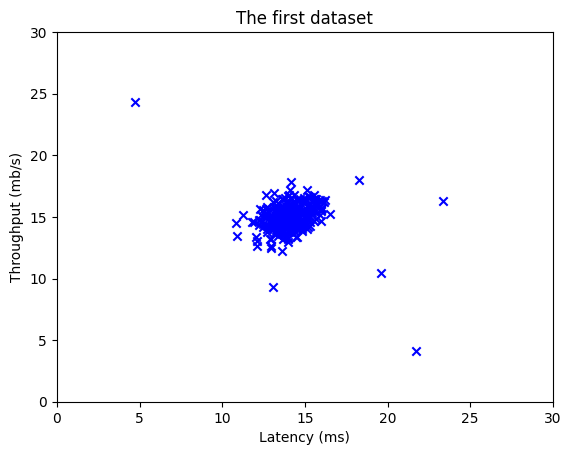

In [ ]:
#anomaly detection

#datset (throughput(mb/s),latency(ms)of response each server)
# dataset contain m examples of serrvers, m =307
# vast majority of these examples are “normal” (non-anomalous) examples of the servers operating normally
# but there might also be some examples of servers acting anomalously within this dataset.

#define function to load data
x_train_path ="/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/X_part1.npy"
x_val_path ="/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/X_val_part1.npy"
y_val_path = "/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/y_val_part1.npy"

x_train =np.load(x_train_path)
x_val =np.load(x_val_path)
y_val =np.load(y_val_path)

print("x train shape",x_train.shape,"\nx val shape",x_val.shape,"\ny val shape",y_val.shape)
print(" first five elements of x train are : /n",x_train[:5])
print(" first five elements ofx val are : /n",x_val[:5])
print(" first five elements of y val are : /n",y_val[:5])

#you can use a scatter plot to visualize the data (X_train), since it has only two properties to plot (throughput and latency)
plt.scatter(x_train[:,0],x_train[:,1],marker ='x',c='b')
plt.title("The first dataset")
plt.ylabel('Throughput (mb/s)')
plt.xlabel('Latency (ms)')
plt.axis([0, 30, 0, 30])
plt.show()

mean of each features [14.11222578 14.99771051]
variance of each features [1.83263141 1.70974533]
value of probability density function shape (307,)
shape of training data (307, 2)
Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set: 0.875000


<ipython-input-11-55f360169b53>:78: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)


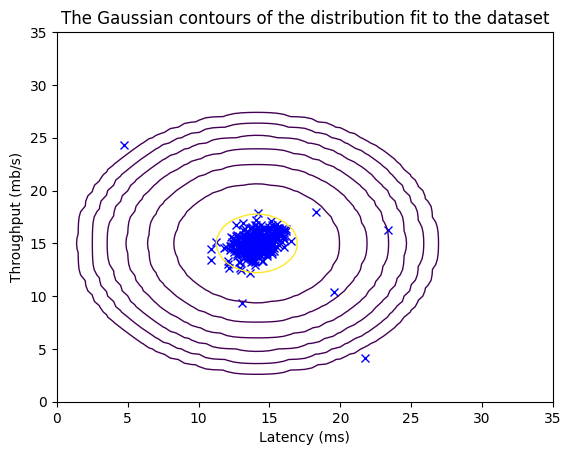

In [ ]:
#iven a training set you want to estimate the Gaussian distribution for each of the features xi
#For each feature i = 1,2.....,n  , you need to find parametersand mue sigma that fit the data in the -th dimension (the -th dimension of each example).

def estimate_gaussian(x):
  m,n =x.shape
  mu =1/ m*np.sum(x, axis =0)
  var =1/ m*np.sum((x-mu)**2 ,axis =0)
  return mu,var #mu and var mean of all features, variance of features (that means out put is column vector on shape of (n,))

# let's check this function
mu,var =estimate_gaussian(x_train)
print("mean of each features",mu)
print("variance of each features",var)


# important notes :
#1 the main idea : is that normal instances in the data come from a specific distribution, often assumed to be a Gaussian distribution,so The assumption is that normal instances in your data set follow a Gaussian distribution
#2 then we use mu and var of each features to estimate probability deisity function of each example
#3 For each example in your dataset, you can calculate the probability (density) that the example belongs to the learned Gaussian distribution.
#4 Low probability indicates that the example is unlikely to belong to the distribution and might be an anomaly.
#5 Establishing a threshold probability below which instances are considered anomalies.


#multivariate_gaussian : function Computes the probability density function of the examples X under the multivariate gaussian distribution with parameters mu and var
#If var is a matrix, it istreated as the covariance matrix. If var is a vector, it is treatedas the var values of the variances in each dimension (a diagonal covariance matrix
def multivariate_gaussian(x,mu,var):
  k =len(mu) # it's n , number of features
  if var.ndim==1:
    var =np.diag(var)

  x = x - mu
  p =(2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * \
      np.exp(-0.5 * np.sum(np.matmul(x, np.linalg.pinv(var)) * x, axis=1))
  return p

#ceck this function code
p = multivariate_gaussian(x_train, mu, var)
print("value of probability density function shape",p.shape)
print("shape of training data",x_train.shape)

#let's make function to visualize proablilty
def visualize_fit(x,mu,var):
  x1,x2= np.meshgrid(np.arange(0, 35.5, 0.5), np.arange(0, 35.5, 0.5))
  z = multivariate_gaussian(np.stack([x1.ravel(), x2.ravel()], axis=1), mu, var)
  z =z.reshape(x1.shape)
  plt.plot(x[:, 0],x[:, 1], 'bx')

  if np.sum(np.isinf(z)) == 0:
    plt.contour(x1, x2, z, levels=10**(np.arange(-20., 1, 3)), linewidths=1)

    # Set the title
  plt.title("The Gaussian contours of the distribution fit to the dataset")
    # Set the y-axis label
  plt.ylabel('Throughput (mb/s)')
    # Set the x-axis label
  plt.xlabel('Latency (ms)')

#let's checl this function
visualize_fit(x_train,mu,var)

#one way to determine which examples are anomalies is to select a threshold based on a cross validation set.
# we will create function Finds the best threshold to use for selecting outliers   based on the results from a validation set (p_val) and the ground truth (y_val)

#Choosing the best value for the threshold in anomaly detection is a critical step, as it determines the trade-off between false positives and false negatives.
#Choose the threshold that maximizes a chosen evaluation metric
# there is many methodes to choose best value of thresold "check it on chat gpt "

def select_threshold(y_val,p_val):
  best_epsilon =0
  best_F1 =0
  F1 =0
  step_size = (max(p_val)-min(p_val))/1000
  for epsilon in np.arange(min(p_val),max(p_val),step_size) :
    predictions = (p_val < epsilon)
    tp = np.sum((predictions == 1) & (y_val == 1))
    fn = np.sum((predictions == 0) & (y_val == 1))
    fp = sum((predictions == 1) & (y_val == 0))
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    F1 = 2 * prec * rec / (prec + rec)
    if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon

  return best_epsilon, best_F1

# let's check thi function
p_val = multivariate_gaussian(x_val, mu, var) # note that we usef mu and variance of x_train
epsilon, F1 = select_threshold(y_val, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)







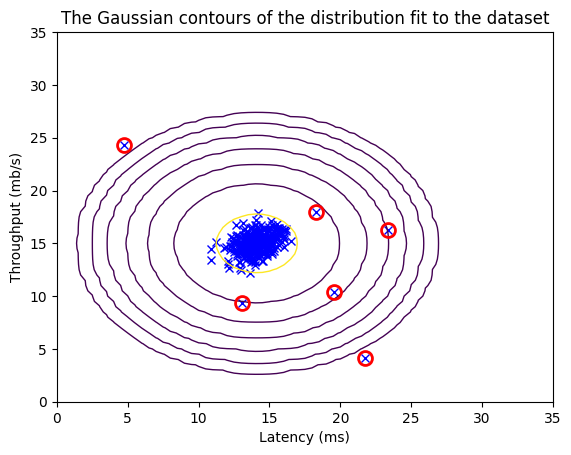

In [ ]:
# Find the outliers in the training set
outliers = p < epsilon
visualize_fit(x_train, mu, var)
plt.plot(x_train[outliers,0],x_train[outliers,1],'ro',markersize =10,markerfacecolor='none',
         markeredgewidth=2)

In [ ]:
x_train_high_path ="/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/X_part2.npy"
x_val_high_path ="/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/X_val_part2.npy"
y_val_high_path  = "/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/y_val_part2.npy"

x_train_high =np.load(x_train_high_path)
x_val_high =np.load(x_val_high_path)
y_val_high =np.load(y_val_high_path)


print("x train shape",x_train_high.shape,"\nx val shape",x_val_high.shape,"\ny val shape",y_val_high.shape)

mu_high, var_high = estimate_gaussian(x_train_high)
p_high = multivariate_gaussian(x_train_high, mu_high, var_high)# note here p for training dataset, but mu and var from training dataset
p_val_high = multivariate_gaussian(x_val_high, mu_high, var_high) # here p for validation dataset , but mu and var from training dataset
epsilon_high, F1_high = select_threshold(y_val_high, p_val_high)

print('Best epsilon found using cross-validation: %e'% epsilon_high)
print('Best F1 on Cross Validation Set:  %f'% F1_high)
print('# Anomalies found: %d'% sum(p_high < epsilon_high))


x train shape (1000, 11) 
x val shape (100, 11) 
y val shape (100,)
Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Cross Validation Set:  0.615385
# Anomalies found: 117


<ipython-input-140-378c098dcabe>:78: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)


#**Week 3:**

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

#The goal of a collaborative filtering recommender system is to generate two vectors: For each user
#1 a 'parameter vector' that embodies the movie tastes of a user. For each movie"i think this w "
#2 a feature vector of the same size which embodies some description of the movie.
# The dot product of the two vectors plus the bias term should produce an estimate of the rating the user might give to that movie.
#Once the feature vectors and parameters are learned, they can be used to predict how a user might rate an unrated movie. This is shown in the diagram above. The equation is an example of predicting a rating for

from google.colab import drive
drive.mount('/content/drive')


#you will implement the function cofiCostFunc that computes the collaborative filtering objective function.
# this one means implement cost function of looker

#load data
x_path  = "/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/small_movies_X.csv"
w_path = "/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/small_movies_W.csv"
b_path = "/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/small_movies_b.csv"
y_bath = "/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/small_movies_Y.csv"
r_bath ="/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/small_movies_Y.csv"

x =np.loadtxt(x_path,delimiter=',')
w =np.loadtxt(w_path,delimiter=',')
b =np.loadtxt(b_path,delimiter=',').reshape(1,-1)
y =np.loadtxt(y_bath,delimiter=',')
r =np.loadtxt(r_bath,delimiter=',')

num_movies,num_features =x.shape
num_users = w.shape[0]

print("Y", y.shape, "R", r.shape)
print("X", x.shape)
print("W", w.shape)
print("b", b.shape)
print("num_features", num_features)
print("num_movies",   num_movies)
print("num_users",    num_users)

#average ratings
tsmean =np.mean(y[0,r[0,:].astype(bool)])
print(f"Averafge rating for movie 1 : {tsmean:0.3f}/5")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Y (4778, 443) R (4778, 443)
X (4778, 10)
W (443, 10)
b (1, 443)
num_features 10
num_movies 4778
num_users 443
Averafge rating for movie 1 : 3.400/5


In [22]:
#mplementing the cost function using for loops
#First, develop the cost function without regularization.
#Once that is working, add regularization and run the tests that include regularization
#Note that you should be accumulating the cost for user j and movie i only if R(i,j) =1
def cofi_cost_func(x,w,b,y,r,lambada_):
  nm,nu =y.shape
  j = 0
  for j in range(nu):
    w_=w[j,:]
    b_j =b[0,j]
    for i in range(nm):
      x_ =x[i,:]
      y_ =y[i,j]
      r_ =r[i,j]
      j +=r_ * np.square((np.dot(w_,x_)+b_j - y_))
  j +=(lambada_) *(np.sum(np.square(w))+ np.sum(np.square(x)))
  j =j/2
  return j




In [25]:
#let's check this function
num_users_r = 4
num_movies_r = 5
num_features_r = 3

X_r = x[:num_movies_r, :num_features_r]
W_r = w[:num_users_r,  :num_features_r]
b_r = b[0, :num_users_r].reshape(1,-1)
Y_r = y[:num_movies_r, :num_users_r]
R_r = r[:num_movies_r, :num_users_r]
# Evaluate cost function
J = cofi_cost_func(X_r, W_r, b_r, Y_r, R_r, 0);
print(f"Cost: {J:0.2f}")


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices